In [11]:
# This Jupyter notebook containes the code used to generate the plots in the final project in the course "Introduction to Data Analysis (71253)", 2023.
# Written by: Michal Mannes and David Zingerman

In [12]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

In [13]:
# import data from SPSS file

path = r"C:\Users\zinge\Documents\BSc\Y3\S2\מבוא למדעי הנתונים 71253\datsets\Pew-Research-Center-Global-Attitudes-Spring-2019-Survey-Data\Pew Research Center Global Attitudes Spring 2019 Dataset WEB.sav"
pew = pd.read_spss(path)

# leave only questions answered by all (columns with no null values)
pew = pew.dropna(axis=1, how='any')

# Getting to know the data

In [14]:
# basic information about the data
pew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38426 entries, 0 to 38425
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     38426 non-null  float64 
 1   survey                 38426 non-null  category
 2   country                38426 non-null  category
 3   weight                 38426 non-null  float64 
 4   LADDER_NOW             38426 non-null  category
 5   COUNTRY_SATIS          38426 non-null  category
 6   ECON_SIT               38426 non-null  category
 7   CHILDREN_BETTEROFF2    38426 non-null  category
 8   SATISFIED_DEMOCRACY    38426 non-null  category
 9   FAV_US                 38426 non-null  category
 10  FAV_CHINA              38426 non-null  category
 11  FAV_RUSSIA             38426 non-null  category
 12  FAV_EU                 38426 non-null  category
 13  FAV_UN                 38426 non-null  category
 14  FUTURE_CULTURE         38426 non-null 

In [15]:
# number of countries in the data
len(pew['country'].unique())

34

In [16]:
df19 = pew.copy()

Text(0, 0.5, 'Count')

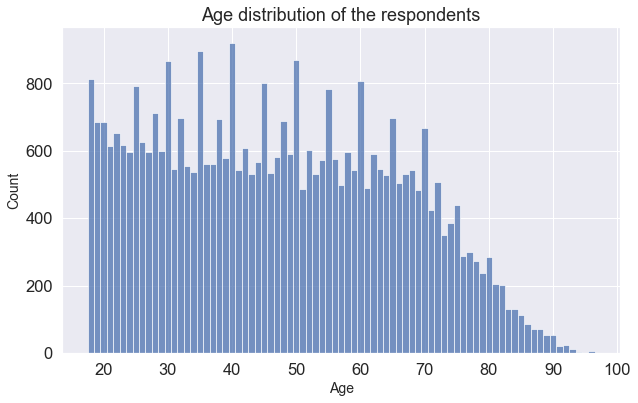

In [17]:
# remove rows with non-float values in AGE column
df19_clean_age = df19[df19['AGE'].apply(lambda x: isinstance(x, float))] 
df19_clean_age['AGE'].describe()

# plot the age distribution
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.5)
sns.histplot(data=df19_clean_age, x='AGE', bins=20)

# title
plt.title("Age distribution of the respondents", fontsize=18)

plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)

Text(0.5, 1.0, 'Gender distribution of the respondents')

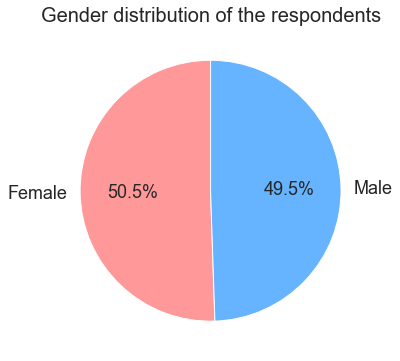

In [18]:
# plot the distribution of the sex of the respondents in a pie chart
plt.figure(figsize=(10, 6))
plt.pie(df19_clean_age['SEX'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], textprops={'fontsize': 18})
# change background color to white
plt.rcParams['axes.facecolor'] = 'white'
# title
plt.title("Gender distribution of the respondents", fontsize=20)

Text(0, 0.5, 'Count')

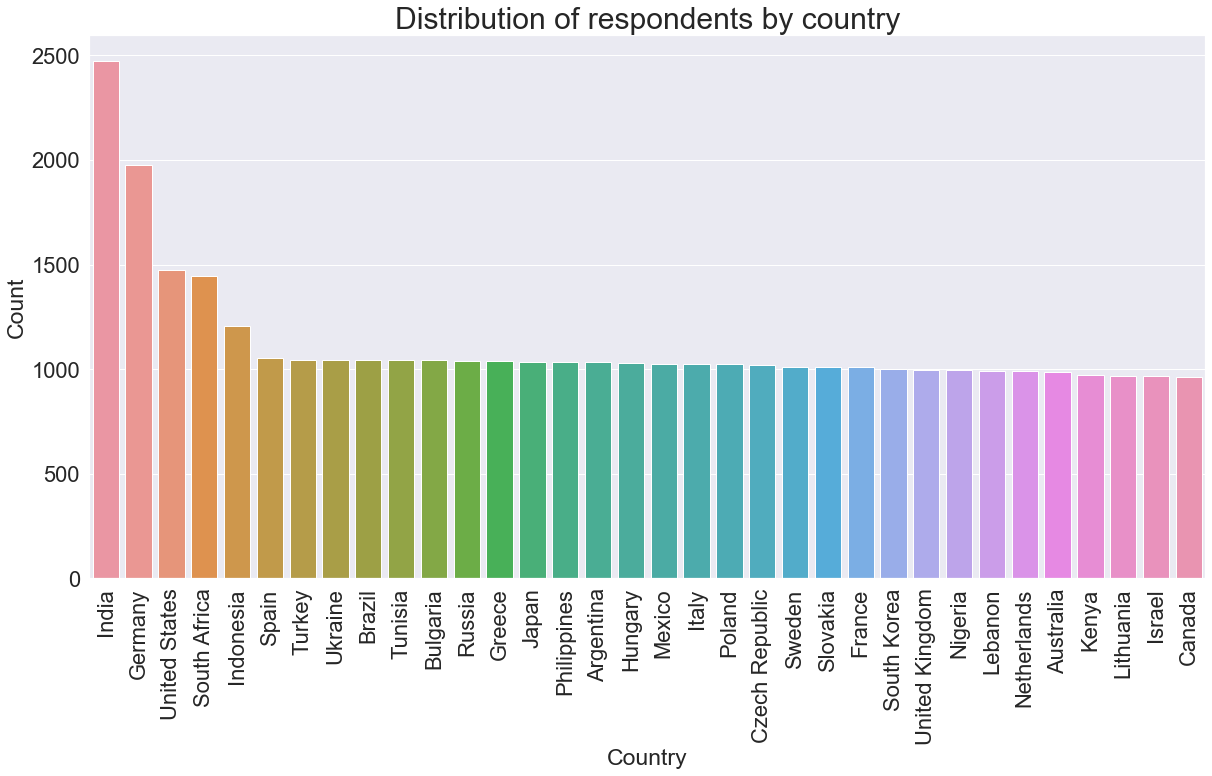

In [19]:
# plot the distribution of respondents by country
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.countplot(data=df19_clean_age, x='country', order=df19_clean_age['country'].value_counts().index)
plt.xticks(rotation=90)
# title
plt.title("Distribution of respondents by country", fontsize=30)

plt.xlabel("Country", fontsize=23)
plt.ylabel("Count", fontsize=23)

# Analysing the opinion of the people on homosexuality (and more)

In [20]:
# replace the answers with shorter names
pew_homosexuality = pew.replace({'HOMOSEXUALITY': {'Homosexuality should be accepted by society': 'Yes', 'Homosexuality should not be accepted by society': 'No', 'Dont know (DO NOT READ)': 'Dont know', 'Refused (DO NOT READ)': 'Refused'}})
pew_homosexuality['HOMOSEXUALITY'].value_counts()

Yes          20446
No           14568
Dont know     2686
Refused        726
Name: HOMOSEXUALITY, dtype: int64

<AxesSubplot:xlabel='level_1', ylabel='percent'>

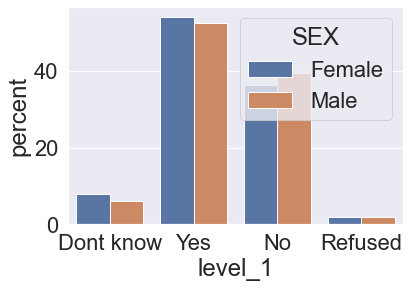

In [21]:
# plot a bar plot of the answers percentages (not counts) stratified by country

df = pew_homosexuality.copy()
question = 'HOMOSEXUALITY'
stratify_by = 'SEX'
df = df.groupby(stratify_by)[question].value_counts(normalize=True).mul(100).reset_index(name='percent') # mul 100 to get percentages
df = df.rename(columns={question: 'level_1'})

sns.barplot(x='level_1', y='percent', hue=stratify_by, data=df)

In [22]:
# a function to plot a bar plot of the answers to a question (with percentages)
# give an option to stratify by another variable (e.g. sex, age, country)

def plot_bar(df, question, country='All', stratify_by=None):

    if country != 'All':
        df = df[df['country'] == country]
    
    df = df.groupby(stratify_by)[question].value_counts(normalize=True).mul(100).reset_index(name='percent') # mul 100 to get percentages
    df = df.rename(columns={question: 'level_1'}) 

    sns.barplot(x='level_1', y='percent', hue=stratify_by, data=df)
    plt.title(f'{question} in {country}')
    plt.show()

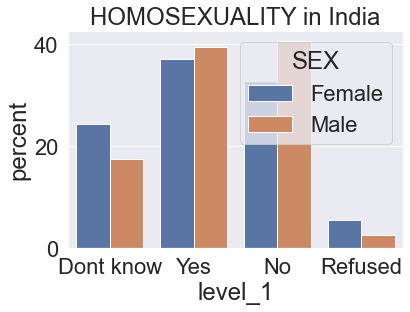

In [23]:
# plot the answers to the question "Do you think that homosexuality should be accepted by society?"

plot_bar(pew_homosexuality, 'HOMOSEXUALITY', 'India', 'SEX')

In [24]:
# function to plot a stacked barplot of a categorical variable stratified by a numerical variable

def plot_stacked_barplot(var1, var2):
    pew_copy = pew.copy()
    df_var1_var2 = pew_copy[[var1, var2]]

    # convert variable to string
    df_var1_var2[var1] = df_var1_var2[var1].astype(str)
    df_var1_var2[var2] = df_var1_var2[var2].astype(str)

    # create a plot area
    plt.figure(figsize=(15, 10))
    # plot stacked barplot
    ax = sns.histplot(x=var1, hue=var2, data=df_var1_var2, multiple='fill', legend=(2, 2))
    
    # Move the legend outside the plot
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    # rotate x labels
    plt.xticks(rotation=90)

    plt.title('Distribution of ' + var1 + ' stratified by ' + var2.lower())
    plt.xlabel(var1.capitalize())
    plt.ylabel('Proportion')
    sns.set(font_scale=2)

C:\Users\zinge\AppData\Local\Temp\ipykernel_33148\2581381851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var1_var2[var1] = df_var1_var2[var1].astype(str)
C:\Users\zinge\AppData\Local\Temp\ipykernel_33148\2581381851.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var1_var2[var2] = df_var1_var2[var2].astype(str)


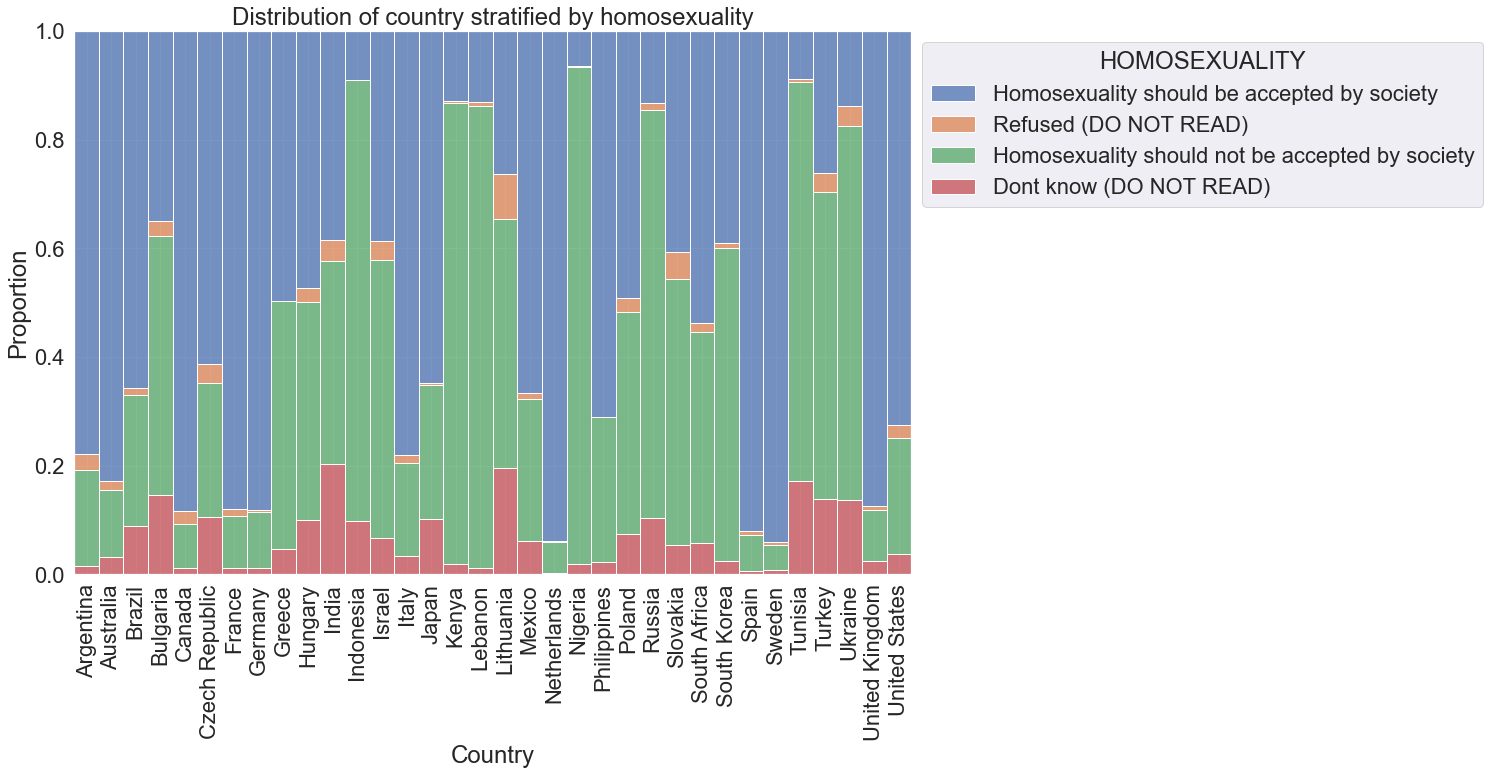

In [25]:
plot_stacked_barplot('country', 'HOMOSEXUALITY')

In [26]:
pew['CHILDREN_BETTEROFF2'].value_counts()

Worse off                  17542
Better off                 16380
Same (DO NOT READ)          2247
Dont know (DO NOT READ)     2120
Refused (DO NOT READ)        137
Name: CHILDREN_BETTEROFF2, dtype: int64

In [27]:
# make a dataframe with the relevant variables, and convert the questions to acceptance rates (1-yes, 0-no)

pew_selected = pew[['country', 'AGE', 'SEX', 'HOMOSEXUALITY', 'RELIGIOUS_FREEDOM', 'GENDER_EQUALITY', 'FREE_ELECTIONS', 'WOMEN_JOB', 'SOCIAL_NET', 'USE_INTERNET', 'RELIGION_IMPORT', 'FUTURE_GAP', 'CHILDREN_BETTEROFF2']]

# in the AGE column, drop the rows with the value 'Refused (DO NOT READ)' or 'Dont know (DO NOT READ)' or '97 and older'
pew_selected = pew_selected[pew_selected['AGE'] != 'Refused (DO NOT READ)']
pew_selected = pew_selected[pew_selected['AGE'] != "Don’t know (DO NOT READ)"]
pew_selected = pew_selected[pew_selected['AGE'] != '97 or older']

pew_selected['SEX'] = pew_selected['SEX'].replace(['Female', 'Male'], [1, 0])
pew_selected['HOMOSEXUALITY'] = pew_selected['HOMOSEXUALITY'].replace(['Homosexuality should be accepted by society', 'Homosexuality should not be accepted by society', 'Dont know (DO NOT READ)', 'Refused (DO NOT READ)'], [1, 0, 0, 0])
pew_selected['RELIGIOUS_FREEDOM'] = pew_selected['RELIGIOUS_FREEDOM'].replace(['Very important', 'Somewhat important', 'Not too important', 'Not important at all', 'Don’t know (DO NOT READ)', 'Refused (DO NOT READ)'], [1, 1, 0, 0, 0, 0])
pew_selected['GENDER_EQUALITY'] = pew_selected['GENDER_EQUALITY'].replace(['Very important', 'Somewhat important', 'Not too important', 'Not important at all', 'Don’t know (DO NOT READ)', 'Refused (DO NOT READ)'], [1, 1, 0, 0, 0, 0])
pew_selected['FREE_ELECTIONS'] = pew_selected['FREE_ELECTIONS'].replace(['Very important', 'Somewhat important', 'Not too important', 'Not important at all', 'Don’t know (DO NOT READ)', 'Refused (DO NOT READ)'], [1, 1, 0, 0, 0, 0])
pew_selected['WOMEN_JOB'] = pew_selected['WOMEN_JOB'].replace(['Completely disagree', 'Completely agree', 'Mostly agree', 'Mostly disagree', 'Don’t know (DO NOT READ)', 'Refused (DO NOT READ)'], [1, 0, 0, 1, 0, 0])
pew_selected['SOCIAL_NET'] = pew_selected['SOCIAL_NET'].replace(['Yes', 'No', 'Don’t know (DO NOT READ)', 'Refused (DO NOT READ)'], [1, 0, 0, 0])
pew_selected['USE_INTERNET'] = pew_selected['USE_INTERNET'].replace(['Yes', 'No', 'Don’t know (DO NOT READ)', 'Refused (DO NOT READ)'], [1, 0, 0, 0])
pew_selected['RELIGION_IMPORT'] = pew_selected['RELIGION_IMPORT'].replace(['Very important', 'Somewhat important', 'Not too important', 'Not at all important', 'Dont know (DO NOT READ)', 'Refused (DO NOT READ)'], [1, 1, 0, 0, 0, 0])
pew_selected['FUTURE_GAP'] = pew_selected['FUTURE_GAP'].replace(['Pessimistic', 'Optimistic', 'Neither (DO NOT READ)', 'Don’t know (DO NOT READ)', 'Refused (DO NOT READ)'], [0, 1, 0, 0, 0])
pew_selected['CHILDREN_BETTEROFF2'] = pew_selected['CHILDREN_BETTEROFF2'].replace(['Worse off', 'Better off', 'Refused (DO NOT READ)', 'Dont know (DO NOT READ)', 'Same (DO NOT READ)'], [0, 1, 0, 0, 0])

# Convert all numbers in the DataFrame to numeric type
pew_selected = pew_selected.apply(pd.to_numeric, errors='ignore')

In [28]:
# make a df with all the countries and acceptance rates for each variable

# group by country, calculate the sum of each variable, and divide by the number of respondents in each country
pew_selected_grouped = pew_selected.groupby('country').sum()/pew_selected.groupby('country').count()
pew_selected_grouped = pew_selected_grouped.reset_index()

# add the gdp per capita for each country
gdp_per_capita = pd.read_csv(r"C:\Users\zinge\Documents\BSc\Y3\S2\מבוא למדעי הנתונים 71253\Final project\GDP\gdp_per_capita.csv")
# keep only the columns 'Country name', 'Code' and '2019'
gdp_per_capita19 = gdp_per_capita[['Country Name', 'Code', '2019']]
# rename the columns
gdp_per_capita19.columns = ['country', 'code', 'gdp_per_capita']
# merge the two dataframes
pew_selected_grouped = pd.merge(pew_selected_grouped, gdp_per_capita19, on='country', how='left')

# drop nan values
pew_selected_grouped = pew_selected_grouped.dropna()

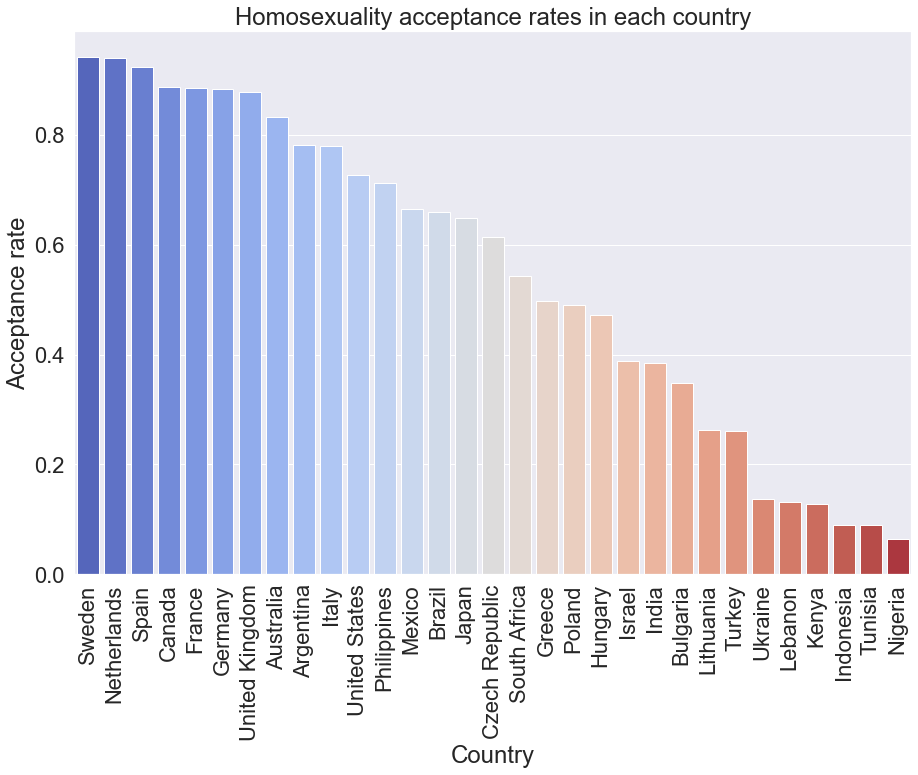

In [29]:
# plot the homosexuality acceptance rates in each country in a barplot (ordered by the acceptance rate)

# sort the dataframe by the homosexuality acceptance rate
pew_selected_grouped_sorted = pew_selected_grouped.sort_values(by='HOMOSEXUALITY', ascending=False)

# plot the homosexuality acceptance rates in each country in a barplot (ordered by the acceptance rate)
plt.figure(figsize=(15, 10))
sns.barplot(x='country', y='HOMOSEXUALITY', data=pew_selected_grouped_sorted, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Homosexuality acceptance rates in each country')
plt.xlabel('Country')
plt.ylabel('Acceptance rate')
plt.show()


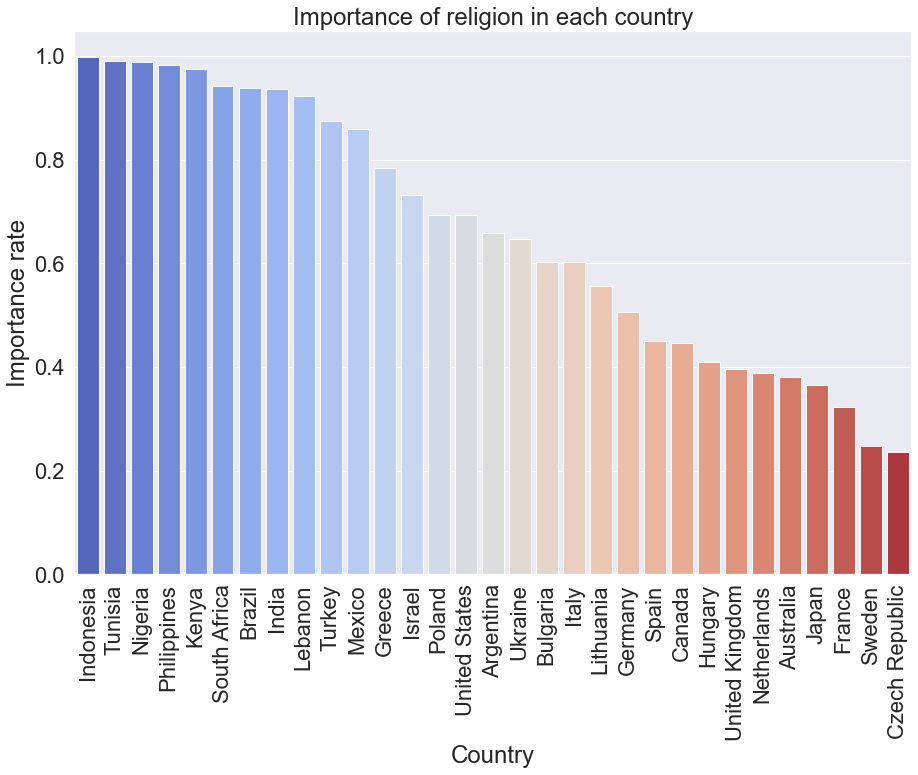

In [30]:
# plot the importance of religion rates in each country in a barplot (ordered by the acceptance rate)

# sort the dataframe by the importance of religion
pew_selected_grouped_sorted = pew_selected_grouped.sort_values(by='RELIGION_IMPORT', ascending=False)

# plot the importance of religion in each country in a barplot (ordered by the acceptance rate)
plt.figure(figsize=(15, 10))
sns.barplot(x='country', y='RELIGION_IMPORT', data=pew_selected_grouped_sorted, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Importance of religion in each country')
plt.xlabel('Country')
plt.ylabel('Importance rate')
plt.show()

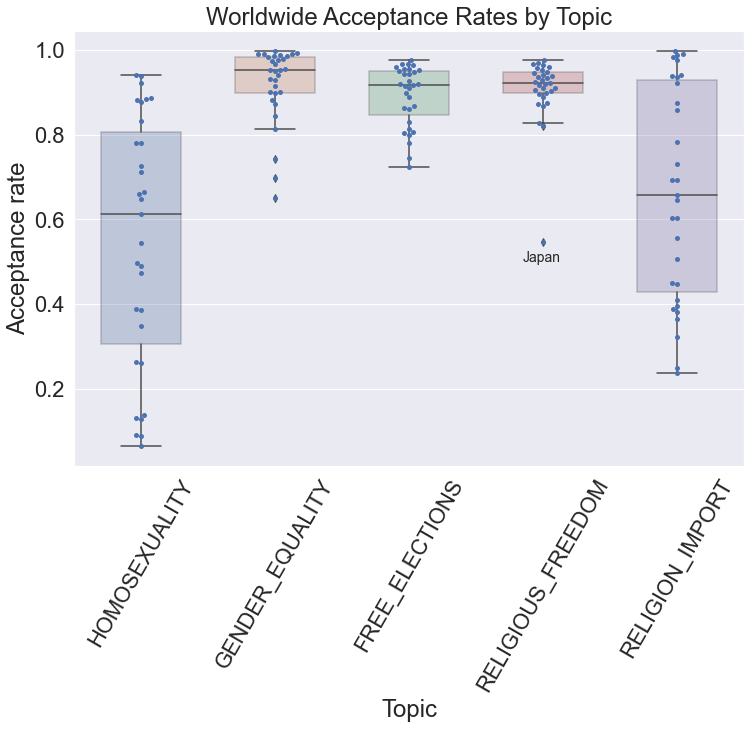

In [31]:
# plot a swarmplot of the acceptence rates: x axis - 'HOMOSEXUALITY', 'RELIGIOUS_FREEDOM', 'GENDER_EQUALITY', 'FREE_ELECTIONS', 'WOMEN_JOB', y axis - acceptance rate

columns_to_plot = ['HOMOSEXUALITY', 'GENDER_EQUALITY', 'FREE_ELECTIONS', 'RELIGIOUS_FREEDOM', 'RELIGION_IMPORT']

# Specify the columns for the x-axis
x_columns = columns_to_plot

# Reshape the DataFrame using melt
melted_df = pew_selected_grouped.melt(value_vars=x_columns, var_name='x_column', value_name='value_column')

# Create the swarm plot
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
sns.swarmplot(x='x_column', y='value_column', data=melted_df, )
sns.boxplot(x='x_column', y='value_column', data=melted_df, width=0.6, boxprops={'alpha': 0.3})
plt.text(2.85, 0.5, 'Japan', fontsize=14)

# Set plot labels and title
plt.xlabel('Topic')
plt.ylabel('Acceptance rate')
plt.title('Worldwide Acceptance Rates by Topic')

# Rotate x-axis labels if needed
plt.xticks(rotation=60)

# Display the plot
plt.show()

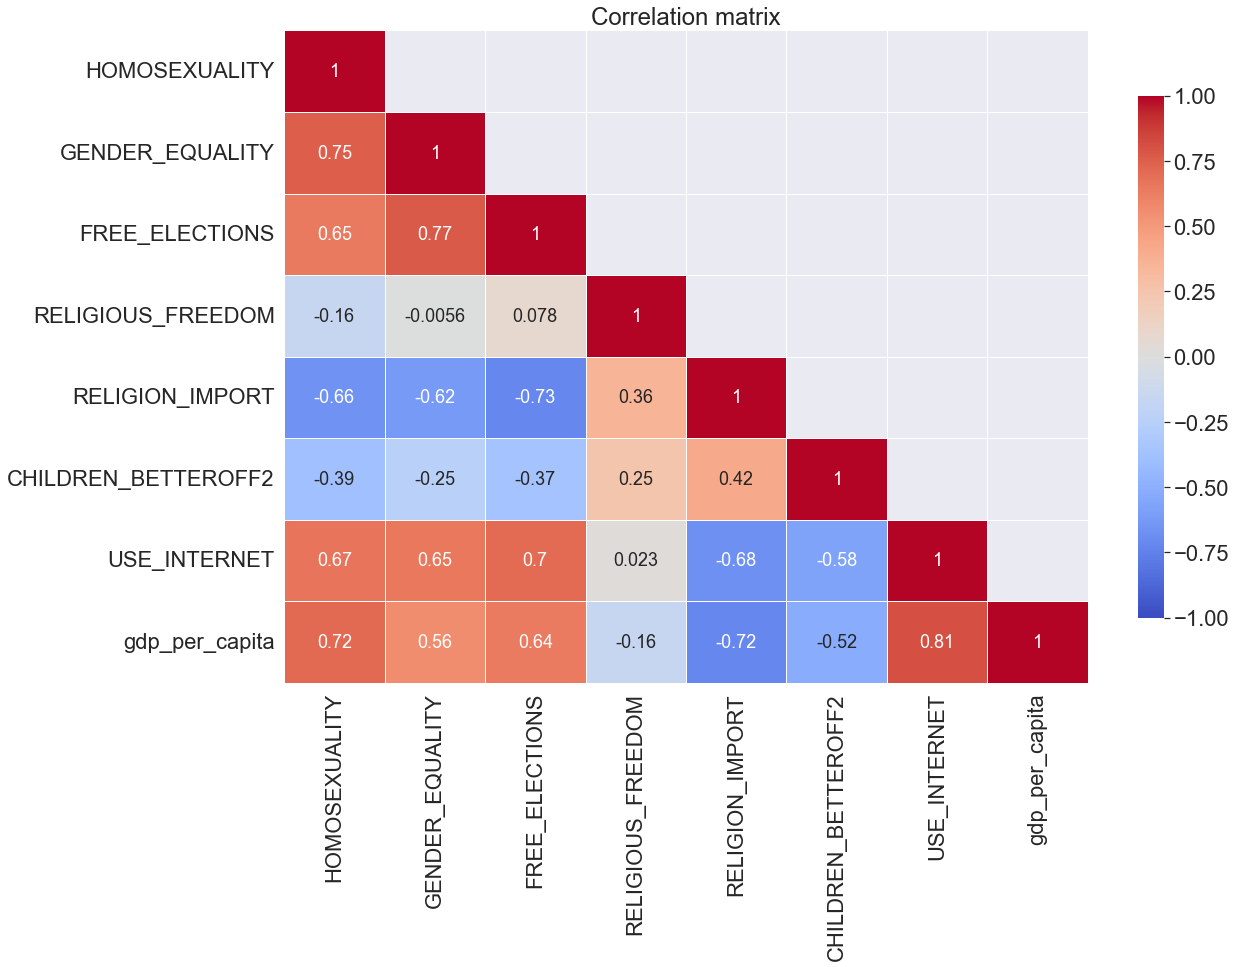

In [32]:
# plot correlation matrix
# cols to plot
corr_matrix_columns = ['HOMOSEXUALITY', 'GENDER_EQUALITY', 'FREE_ELECTIONS', 'RELIGIOUS_FREEDOM', 'RELIGION_IMPORT', 'CHILDREN_BETTEROFF2','USE_INTERNET', 'gdp_per_capita']
corr = pew_selected_grouped[corr_matrix_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

mask = np.triu(np.ones_like(corr, dtype=bool))
mask[np.diag_indices_from(mask)] = False
# plot the correlation matrix as a heatmap (keep only the upper triangle)
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask
            , cbar_kws={"shrink": .8}, linewidths=0.5, annot_kws={"size": 18})
plt.title('Correlation matrix')
plt.show()

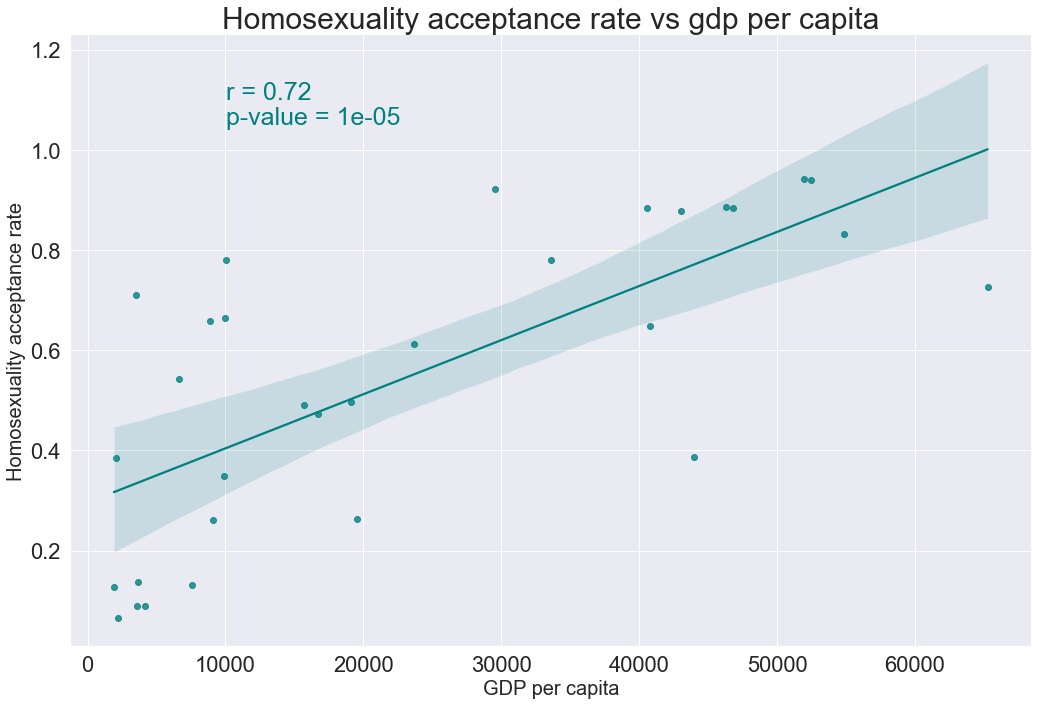

In [33]:
# plot a scatterplot of homosexuality acceptance rate vs gdp per capita (with a regression line and correlation coefficient)
sns.lmplot(x='gdp_per_capita', y='HOMOSEXUALITY', data=pew_selected_grouped, height=10, aspect=1.5, line_kws={'color': 'teal'}, scatter_kws={'color': 'teal'})

# add the correlation coefficient and p-value to the plot
corr, _ = pearsonr(pew_selected_grouped['gdp_per_capita'], pew_selected_grouped['HOMOSEXUALITY'])

plt.text(10010, 1.1, 'r = ' + str(round(corr, 2)), fontsize=25, color='teal')
plt.text(10010, 1.05, 'p-value = ' + str(round(_, 5)), fontsize=25, color='teal')

plt.title('Homosexuality acceptance rate vs gdp per capita', fontsize=30)
plt.xlabel('GDP per capita', fontsize=20)
plt.ylabel('Homosexuality acceptance rate', fontsize=20)
plt.show()

<Figure size 864x576 with 0 Axes>

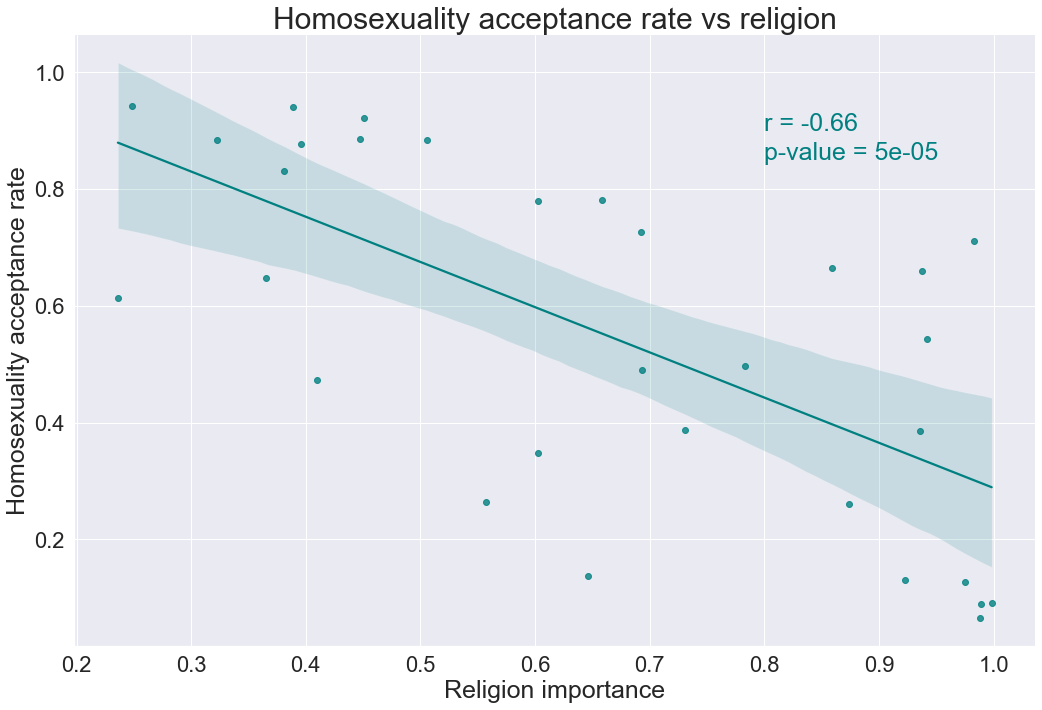

In [34]:

# plot a scatterplot of homosexuality acceptance rate vs gdp per capita (with a regression line and correlation coefficient)
fig = plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
sns.set(font_scale=2)
sns.lmplot(x='RELIGION_IMPORT', y='HOMOSEXUALITY', data=pew_selected_grouped, height=10, aspect=1.5, line_kws={'color': 'teal'}, scatter_kws={'color': 'teal'})

# add the correlation coefficient and p-value to the plot
corr, _ = pearsonr(pew_selected_grouped['RELIGION_IMPORT'], pew_selected_grouped['HOMOSEXUALITY'])

plt.text(0.8, 0.9,'r = ' + str(round(corr, 2)), fontsize=25, color='teal')
plt.text(0.8, 0.85, 'p-value = ' + str(round(_, 5)), fontsize=25, color='teal')

plt.title('Homosexuality acceptance rate vs religion', fontsize=30)
plt.xlabel('Religion importance', fontsize=25)
plt.ylabel('Homosexuality acceptance rate', fontsize=25)
plt.show()

In [35]:
# write a function to plot the acceptence of homosexuality in every age group in a country, stratified by a variable

# create a df with the age groups
pew_age_groups = pew_selected.copy()
pew_age_groups['AGE'] = pd.to_numeric(pew_age_groups['AGE'], errors='coerce')
pew_age_groups = pew_age_groups.dropna(subset=['AGE'])
pew_age_groups['age_group'] = pd.cut(pew_age_groups['AGE'], bins=[18, 30, 50, 70, 96], labels=['18-30', '31-50','51-70',  '71-96'])

In [36]:
pew_age_groups_grouped = pew_age_groups.groupby(['age_group'])

In [37]:
ages_18_30 = pew_age_groups_grouped.get_group('18-30')
ages_31_50 = pew_age_groups_grouped.get_group('31-50')
ages_51_70 = pew_age_groups_grouped.get_group('51-70')
ages_71_96 = pew_age_groups_grouped.get_group('71-96')

age_accept = pd.DataFrame(columns=['age_group', 'homosexuality_acceptance_rate', 'religion_importance_rate'])
age_accept.loc[0] = ['18-30', ages_18_30['HOMOSEXUALITY'].mean(), ages_18_30['RELIGION_IMPORT'].mean()]
age_accept.loc[1] = ['31-50', ages_31_50['HOMOSEXUALITY'].mean(), ages_31_50['RELIGION_IMPORT'].mean()]
age_accept.loc[2] = ['51-70', ages_51_70['HOMOSEXUALITY'].mean(), ages_51_70['RELIGION_IMPORT'].mean()]
age_accept.loc[3] = ['71-96', ages_71_96['HOMOSEXUALITY'].mean(), ages_71_96['RELIGION_IMPORT'].mean()]


In [38]:
age_accept

,age_group,homosexuality_acceptance_rate,religion_importance_rate
0,18-30,0.533350,0.695566
1,31-50,0.533924,0.675760
2,51-70,0.540804,0.629313
3,71-96,0.502773,0.657423


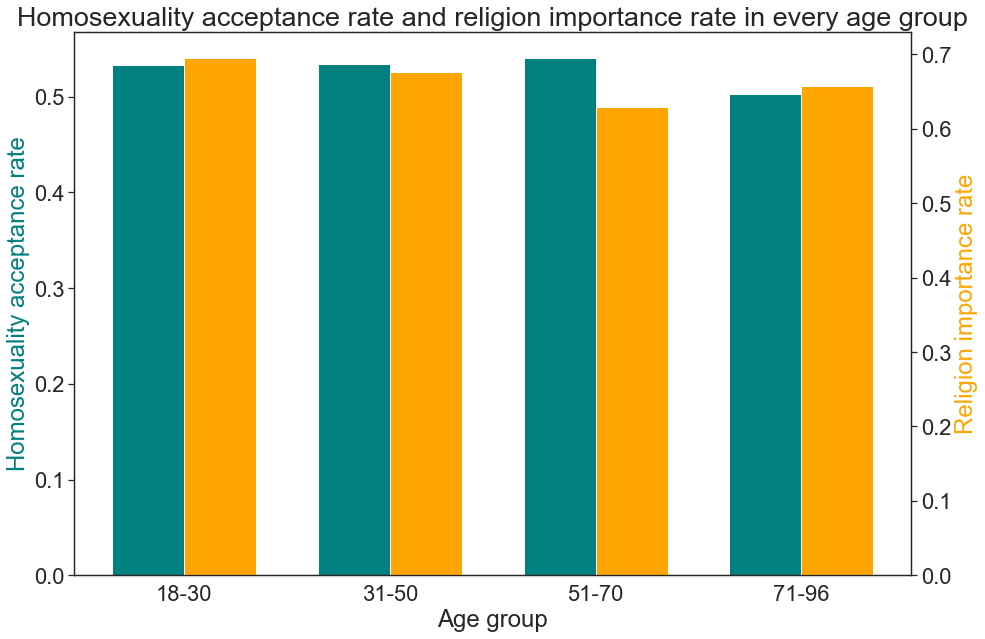

In [39]:
# plot barplot of homosexuality acceptance rate in every age group and religion importance rate in every age group (in the same plot)

sns.set_style("white")
fig, ax1 = plt.subplots(figsize=(15, 10))

plt.figsize=(15, 10)
ax2 = ax1.twinx()

bar_width = 0.35

x = np.arange(len(age_accept['age_group']))

ax1.bar(x - bar_width/2, age_accept['homosexuality_acceptance_rate'], color='teal', width=bar_width, label='Homosexuality Acceptance Rate')
ax2.bar(x + bar_width/2, age_accept['religion_importance_rate'], color='orange', width=bar_width, label='Religion Importance Rate')

ax1.set_xlabel('Age group')
ax1.set_ylabel('Homosexuality acceptance rate', color='teal')
ax2.set_ylabel('Religion importance rate', color='orange')

ax1.set_xticks(x)
ax1.set_xticklabels(age_accept['age_group'])

plt.title('Homosexuality acceptance rate and religion importance rate in every age group', fontsize=27)
plt.show()

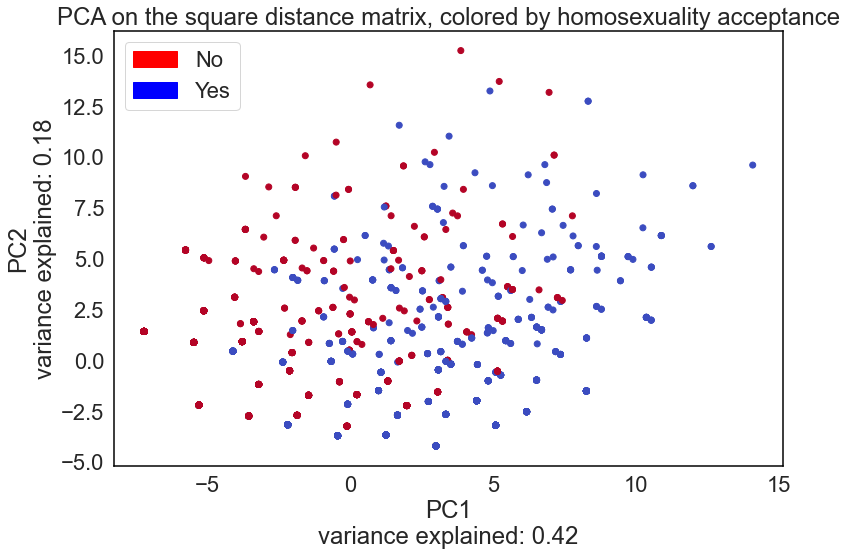

In [40]:
# PCA on the Hamming distance matrix

# import the relevant package
import scipy.spatial.distance as ssd

# choose the questions to include in the PCA
questions_for_pca = ['HOMOSEXUALITY', 'RELIGIOUS_FREEDOM', 'GENDER_EQUALITY', 'FREE_ELECTIONS', 'WOMEN_JOB', 'USE_INTERNET', 'RELIGION_IMPORT', 'FUTURE_GAP', 'CHILDREN_BETTEROFF2']

# create a df with only the relevant questions
df = pew_selected.copy()
df = df[questions_for_pca]

# randonly choose 500 participants
rand_500 = df.sample(2000)

# Convert categorical variables to numerical representation using one-hot encoding
encoded_df = pd.get_dummies(rand_500)

# # Calculate the Hamming distance matrix
distance_matrix = ssd.pdist(encoded_df.values, metric='hamming')

# Convert the condensed distance matrix to a square distance matrix
square_distance_matrix = ssd.squareform(distance_matrix)

# pca on the square distance matrix
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(square_distance_matrix)
square_distance_matrix = pca.transform(square_distance_matrix)

# plot the results
fig = plt.figure(figsize=(12, 8))

plt.scatter(square_distance_matrix[:, 0], square_distance_matrix[:, 1], c=rand_500['HOMOSEXUALITY'], cmap='coolwarm')
plt.title('PCA on the square distance matrix, colored by homosexuality acceptance')
plt.xlabel('PC1\nvariance explained: ' + str(round(pca.explained_variance_ratio_[0], 2)))
plt.ylabel('PC2\nvariance explained: ' + str(round(pca.explained_variance_ratio_[1], 2)))
# add legend to the plot based on the homosexuality acceptance or not
plt.legend(handles=[mpatches.Patch(color='red', label='No'), mpatches.Patch(color='blue', label='Yes')], loc='upper left')

ax = plt.gca()
# Customize the properties of the spines
ax.spines['left'].set_linewidth(1.5)
ax.spines['left'].set_color('black')

ax.spines['right'].set_linewidth(1.5)
ax.spines['right'].set_color('black')

ax.spines['top'].set_linewidth(1.5)
ax.spines['top'].set_color('black')

ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')

plt.show()